<a href="https://colab.research.google.com/github/erika0915/pattern-recognition/blob/main/05_12_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

## 1. 결측치 처리

[수치형 변수]
- 수치형 변수의(float64 타입) 결측치는 중앙값(median)으로 채움
- 이유 : 평균은 이상치의 영향을 많이 받아서 이상치에 강건한 중앙값 사용

[범주형 변수]
- 범주형 변수의(object 타입) 결측치는 최빈값(mode)으로 채움
- 이유 : 범주형은 수치 연산이 불가능하기 때문에, 가장 자주 등장하는 값을 결측치에 대입하는 방법을 선택

</br>

test 데이터셋도 train 데이터에서 구한 중앙값/최빈값을 기준으로 동일하게 결측치를 채워 일관성 유지

In [ ]:
# 1.1 결측치 처리
# 수치형 -> 중앙값으로 채우기 (train)
numeric_cols = train_df.select_dtypes(include=['float64']).columns
train_median = train_df[numeric_cols].median()
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_median)

# 범주형 -> 최빈값으로 채우기 (train))
categorical_cols = train_df.select_dtypes(include='object').columns
train_mode = train_df[categorical_cols].mode().iloc[0]
train_df[categorical_cols] = train_df[categorical_cols].fillna(train_mode)

In [ ]:
# 1.2 test_df에도 train_df 기준으로 결측치 채우기
test_numeric_cols = test_df.select_dtypes(include=['float64']).columns
test_categorical_cols = test_df.select_dtypes(include='object').columns

test_df[test_numeric_cols] = test_df[test_numeric_cols].fillna(train_median)
test_df[test_categorical_cols] = test_df[test_categorical_cols].fillna(train_mode)

In [ ]:
# 처리 후 결측치 여부 최종 확인
print('train_df 결측치 개수:', train_df.isnull().sum().sum())
print('test_df 결측치 개수:', test_df.isnull().sum().sum())

train_df 결측치 개수: 0
test_df 결측치 개수: 0


## 2. 불필요한 칼럼 제거


In [ ]:
# 2. 불필요한 칼럼 제거
train_df = train_df.drop(columns=['id', 'shares'])
test_df = test_df.drop(columns=['id'])

In [ ]:
# 불필요한 칼럼 제거 확인
print("\ntrain_df 컬럼 목록:", train_df.columns.tolist())
print("\ntest_df 컬럼 목록:", test_df.columns.tolist())


train_df 컬럼 목록: ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'data_channel', 'weekday', 'y']

test_df 컬럼 목록: ['n_tokens_title', 'n_tokens_content', 'n_unique_tok

## 3. 이상치 처리
수치형 변수에 대해 로그 변환(log1p) 적용
- 극단적으로 오른쪽으로 꼬리가 긴 수치형 변수들만 골라서 np.log1p()를 적용
- 이유 : 분포를 부드럽게 만들고, 이상치의 영향을 줄이기 위해.

In [ ]:
# 3. 수치형 변수 이상치 처리

# log1p 변환 함수 정의
def log1p(x):
    return np.log1p(np.maximum(x, 0))  # x가 음수이면 0으로 취급

# 변환할 수치형 컬럼 리스트
log_transform_cols = [
    'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
    'self_reference_avg_sharess',
    'kw_min_min', 'kw_max_min', 'kw_avg_min',
    'kw_min_max', 'kw_max_max', 'kw_avg_max',
    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg'
]

# train, test 둘 다 변환
for col in log_transform_cols:
    if col in train_df.columns:
        train_df[col] = log1p(train_df[col])
    if col in test_df.columns:
        test_df[col] = log1p(test_df[col])


<ipython-input-61-e591edc8f4f8>:9: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-e591edc8f4f8>:9: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-e591edc8f4f8>:9: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-e591edc8f4f8>:9: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-e591edc8f4f8>:9: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-e591edc8f4f8>:9: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-e591edc8f4f8>:9: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

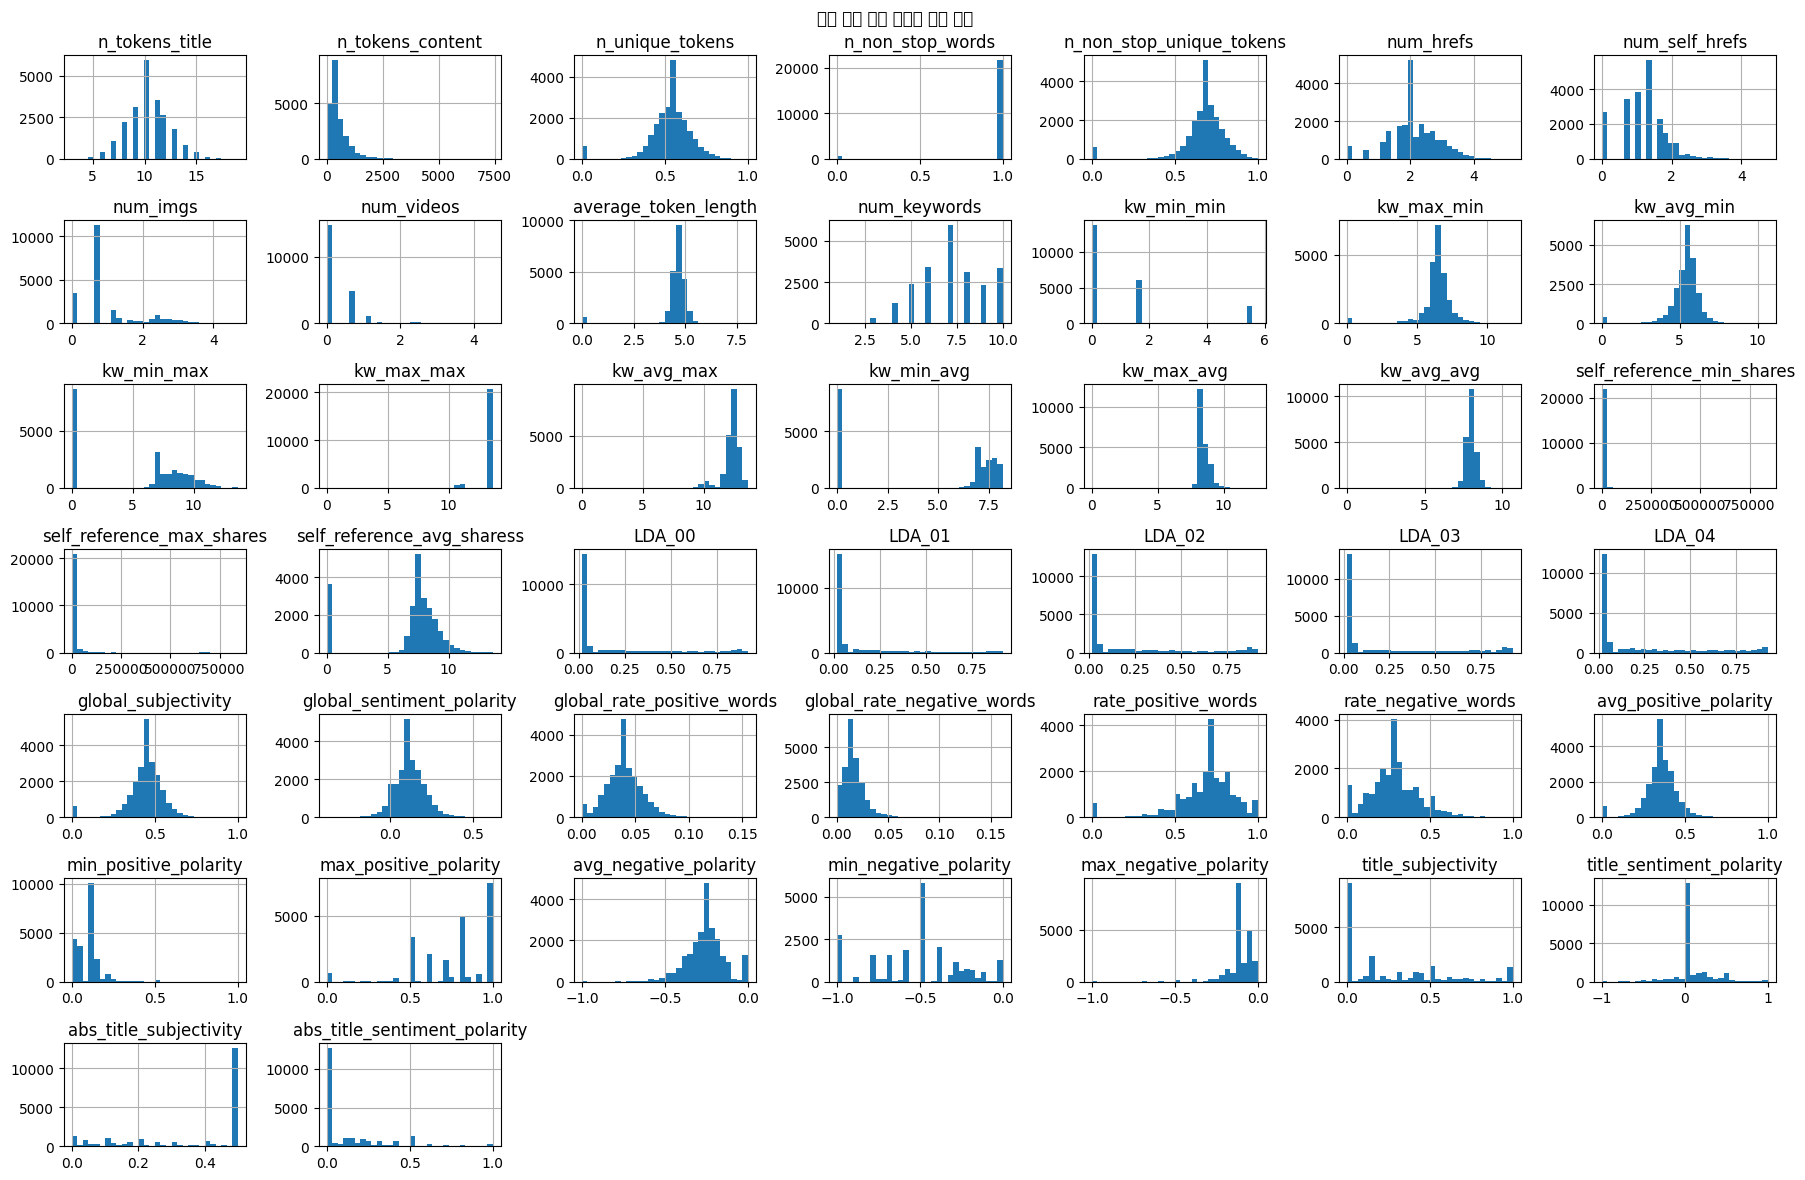

In [ ]:
# log 변환 이후 수치형 변수 다시 히스토그램으로 보기
import matplotlib.pyplot as plt

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('y')  # 타겟 y는 제외

train_df[numeric_cols].hist(bins=30, figsize=(18, 12))
plt.suptitle('로그 변환 이후 수치형 변수 분포')
plt.tight_layout()
plt.show()

## 4. 범주형 변수 인코딩
- data_channel, weekday 변수에 대해 One-Hot Encoding 을 수행함
- drop_first=True 를 사용하여 다중공선성을 방지
- train과 test 데이터에서 칼럼 수가 달라 train에만 있는  train과 test의 feature 수를 일치시킴

In [ ]:
# 4. One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['data_channel', 'weekday'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['data_channel', 'weekday'], drop_first=True)

# train/test 컬럼 수 맞추기
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

test_df = test_df[train_df.drop(columns=['y']).columns]  # test에는 y가 없으니까 y 제외한 순서 맞춰야 함

In [ ]:
# 확인용
# train, test에 object 타입 컬럼이 남아있는지 확인
print("Train 데이터 object 타입 컬럼:", train_df.select_dtypes(include='object').columns.tolist())
print("Test 데이터 object 타입 컬럼:", test_df.select_dtypes(include='object').columns.tolist())

# train, test 컬럼 개수 비교
print(f"Train 컬럼 수: {train_df.shape[1]}")
print(f"Test 컬럼 수: {test_df.shape[1]}")

# train, test 컬럼 이름 비교
train_cols = train_df.drop(columns=['y']).columns.tolist()
test_cols = test_df.columns.tolist()

print("Train과 Test 컬럼 이름 같은가", train_cols == test_cols)


Train 데이터 object 타입 컬럼: []
Test 데이터 object 타입 컬럼: []
Train 컬럼 수: 56
Test 컬럼 수: 55
Train과 Test 컬럼 이름 같은가 True


## 5.  수치형 스케일링
- 입력 변수 x에 대해 StandardScaler를 적용하여 평균 0, 표준편차 1로 정규화
- train 데이터에 대해 fit 한 뒤에 test 데이터에는 transform 만 적용함

In [ ]:
from sklearn.preprocessing import StandardScaler

# 5. 수치형 스케일링
# y를 제외한 입력 변수만 스케일링
X_train = train_df.drop(columns=['y'])
y_train = train_df['y']

X_test = test_df.copy()  # 이미 y 없으니까 그대로

# 스케일러 생성 및 train 데이터에 fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# test 데이터에는 transform만 적용
X_test_scaled = scaler.transform(X_test)

## 6. test/validation 분리 및 CSV 파일로 저장
- 학습용 데이터(80%)와 검증용 데이터(20%)를 구분하기 위해 train_test_split을 사용하여 데이터셋을 나눈다.
- random_state를 고정하여 모두 같은 train/validation 나누기를 하게 된다.
- stratify 옵션을 사용해서 y의 0과 1의 비율이 train/validation 모두 비슷하게 유지되도록 한다.

In [ ]:
from sklearn.model_selection import train_test_split

# 6.1 train/validation 데이터 분리
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [ ]:
# 6.2 분리한 데이터 저장을 위해 DataFrame 변환
X_train_final_df = pd.DataFrame(X_train_final)
X_val_df = pd.DataFrame(X_val)
y_train_final_df = pd.DataFrame(y_train_final)
y_val_df = pd.DataFrame(y_val)

In [ ]:
# 6.3 CSV 파일로 저장
X_train_final_df.to_csv('/content/drive/MyDrive/X_train_final.csv', index=False)
y_train_final_df.to_csv('/content/drive/MyDrive/y_train_final.csv', index=False)
X_val_df.to_csv('/content/drive/MyDrive/X_val.csv', index=False)
y_val_df.to_csv('/content/drive/MyDrive/y_val.csv', index=False)